# Singular Value Decomposition (SVD)
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (3 July 2020)

In [1]:
#For some basic operations
import numpy as np

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

%pylab inline
import matplotlib.image as mpimg

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [2]:
def array_im(image):
    pic=Image.open(image)
    return np.array(pic)

def part_ch(image):
    array_pic=array_im(image)
    return array_pic[:, :, 0], array_pic[:, :, 1], array_pic[:, :, 2]

def compress_ch(channel, sv_lim):
    U, sigma, V = np.linalg.svd(channel)
    reconst=np.matrix(U[:, :sv_lim]) * np.diag(sigma[:sv_lim]) * np.matrix(V[:sv_lim, :])
    return reconst.astype('uint8')

def compress_im(ch_r,ch_g,ch_b,sv_lim):
    compress_r=compress_ch(ch_r, sv_lim)
    compress_g=compress_ch(ch_g, sv_lim)
    compress_b=compress_ch(ch_b, sv_lim)
    red=Image.fromarray(compress_r)
    green=Image.fromarray(compress_g)
    blue=Image.fromarray(compress_b)
    rgb_im = Image.merge("RGB",(red,green,blue))
    return rgb_im


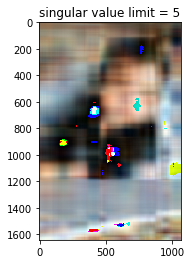

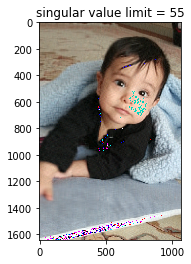

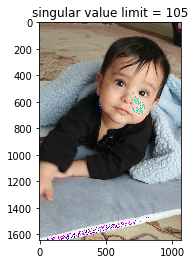

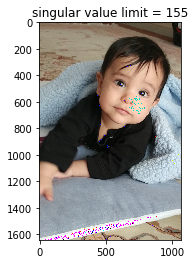

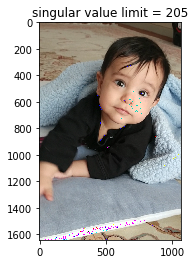

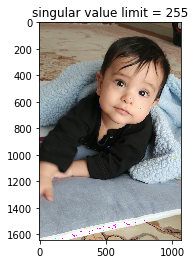

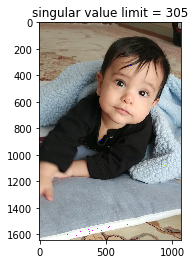

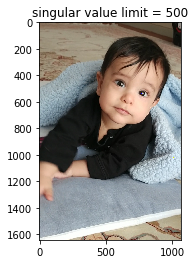

In [3]:
red,green,blue=part_ch("shayani.png")

for i in range(5, 306, 50):
    img=compress_im(red,green,blue,i)
    imgplot = plt.imshow(img)
    title = "singular value limit = %s" % i
    plt.title(title)
    plt.show()

img=compress_im(red,green,blue,500)
imgplot = plt.imshow(img)
title = "singular value limit = 500"
plt.title(title)
plt.show()